# Introducción al Método de Elementos Finitos
## Trabajo práctico 1



Utilice una malla uniforme de tres elementos finitos para resolver la ecuación diferencial:

$$
\frac{d^2u}{dx^2} + 4u = x^2
$$

$$
0<x<1
$$

Condiciones de contorno:

a. $u(0) = 0$, $u(1)=0$

b. $u(0) = 0$, $u'(1)=0$




Genericamente teníamos:

$$
- a \frac{d^2 u}{dx^2} + cu - h = 0
$$

$a = -1$

$c = 4$

$h = x^2$



Lo que tenemos (matricialmente) es:

 $$
 K U = f - T 
 $$
 
 Por lo tanto, tenemos que calcular 
 
 $$
 U = K^{-1} (f-T)
 $$
 
 Pero primero, la solución analítica
 

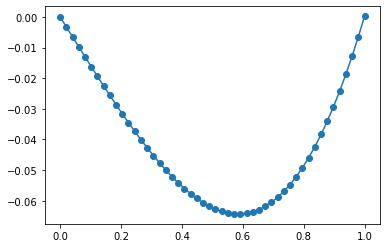

In [41]:
import numpy as np
import matplotlib.pyplot as plt

A = 1/8
B = -.08

x = np.linspace(0,1,50)
y = A*np.cos(2*x) + B*np.sin(2*x) + 1/4*x**2 - 1/8

plt.plot(x,y, '-o')
plt.show()

Ahora construimos la matriz $K$ y el vector $f$

La matriz $K$ es igual a la vista en clase ya que utilizamos dos nodos en cada elemento. Lo que varían es la cantidad de elementos utilizados. 

En cambio dado que el parámetro anteriormente denominado $h$ no es constante, se debe calcular la matriz $f^e$ de cada elemento para luego obtener el vector $f$.

$$ 
f_1 = \frac{1}{L^e} [\frac{x_B}{3} x^3 -\frac{1}{4} x^4] 
$$

$$ 
f_2 = \frac{1}{L^e} [\frac{1}{4} x^4 - \frac{x_A}{3} x^3] 
$$


In [38]:
nelementos = 3 # Cantidad total de elementos
nodos_x_elem = 2
nnodos = (nodos_x_elem-1)*nelementos+1 # Cantidad total de nodos

L = 1.0 # longitud total del dominio
L_e = L/nelementos # longitud de un elemento

a = -1
c = 4

coorx = []
for i in range(nnodos):
    coorx.append(i*L_e)

#Primero armo k_e para luego armar la matriz general k
k_e = a/L_e * np.array([[1, -1], [-1, 1]]) + c*L_e/6 * np.array([[2,1],[1,2]])#

#armo k
k = np.array( [ [ k_e[0,0], k_e[0,1],          0,                 0],
                [k_e[1,0],  k_e[0,0]+k_e[1,1], k_e[0,1],          0],
                [ 0,        k_e[1,0],          k_e[0,0]+k_e[1,1], k_e[0,1]],
                [ 0,        0,                 k_e[1,0],          k_e[1,1]]])


f1s = []
f2s = []
for i in range(nelementos):
    x_A = coorx[i]
    x_B = coorx[i+1]
        
    f1_x_B = 1/L_e * np.array([x_B/3*x_B**3 - 1/4*x_B**4])
    f1_x_A = 1/L_e * np.array([x_B/3*x_A**3 - 1/4*x_A**4])
    f1 = f1_x_B - f1_x_A
    
    f2_x_B = 1/L_e * np.array([1/4*x_B**4 - x_A/3*x_B**3])    
    f2_x_A = 1/L_e * np.array([1/4*x_A**4 - x_A/3*x_A**3])
    f2 = f2_x_B - f2_x_A

    f1s.append(f1)
    f2s.append(f2)
f = np.array([f1s[0], f1s[1] + f2s[0], f1s[2] + f2s[1], f2s[2]])



3.0

Ahora sí busco el vector $U$

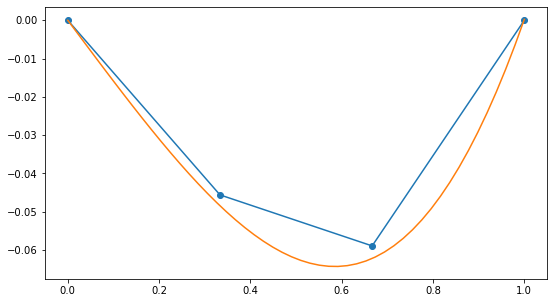

In [43]:
u = np.zeros((nnodos, 1))
u[1:-1] = np.dot(np.linalg.inv(k[1:-1, 1:-1]), f[1:-1])

# u1 y u5 son datos conocidos
u[0] = 0
u[-1] = 0

# Calculo q1 y q5
q = np.zeros((nnodos, 1))
q[0] = np.dot(k[0], u) - f[0]
q[-1] = np.dot(k[-1], u) - f[-1]

plt.figure(figsize =(9,5))
plt.plot(coorx, u, 'o-')
plt.plot(x,y, '-')

plt.show()

In [5]:
# (1/(2*np.sin(2)))*((1/4*np.cos(2))-1/2)

-0.33214473686868984

### Condiciones de Neumann
Ahora lo resolvemos para las condiciones de contorno del inciso b)

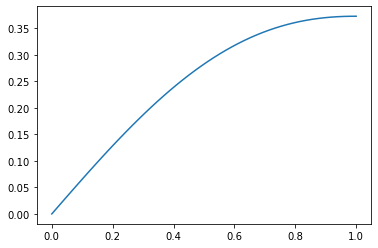

In [44]:
A = 1/8
B = .33
x = np.linspace(0,1,50)
y = A*np.cos(2*x) + B*np.sin(2*x) + 1/4*x**2 - 1/8

plt.plot(x,y, '-')
plt.show()

array([[0.69061749],
       [0.        ],
       [0.        ],
       [0.        ]])

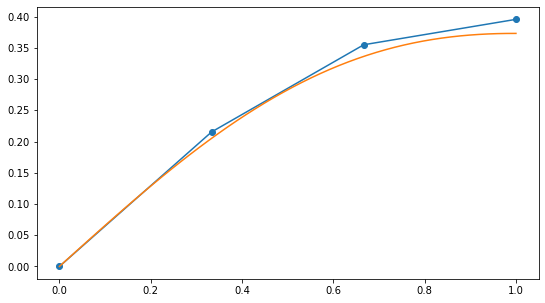

In [46]:
u = np.zeros((nnodos, 1))
q = np.zeros((nnodos, 1))

# u1 y q4 son datos conocidos
u[0] = 0
q[-1] = 0

u[1:] = np.dot(np.linalg.inv(k[1:, 1:]), (f[1:]-q[1:]))

q[0] = k[0,0]*u[0] + k[0,1] * u[1] - f[0]

plt.figure(figsize =(9,5))
plt.plot(coorx, u, 'o-')
plt.plot(x,y, '-')

q

In [31]:
(np.sin(2)-2)/(8*np.cos(2))

0.32761950752290536